### Prerequisites

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from pathlib import Path
from dotenv import load_dotenv
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

load_dotenv()

True

### Data Loading

In [2]:
data_dir = Path(os.environ['dataset_dir'])
df = pd.read_csv(data_dir / 'train.csv')
df = df.set_index('row_id')

### How does the data look like?

In [3]:
df.sample(7)

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
row_id,,,,,,,,,,,,,,,,,,,,,
563_3539,563,3539,-0.032990,0.558447,-0.426785,-1.143657,-0.672958,0.462113,0.652544,0.320128,...,0.638024,-0.342378,0.989271,0.365483,-0.347965,0.912272,0.510321,-0.038355,-1.556602,0.829848
444_1308,444,1308,-0.318023,0.020835,-0.198301,0.869324,-1.004803,-0.592646,0.246376,-1.106594,...,-0.525129,-0.511166,-1.203955,0.138253,-0.593441,-0.843700,1.137386,-0.656492,0.807927,-0.652250
1066_2003,1066,2003,0.982815,0.570184,-0.273304,-1.527920,1.632562,-0.070300,-0.839611,-0.620109,...,0.533301,-0.856745,1.530070,-0.008684,-0.727946,0.263655,1.527700,0.470515,1.719106,0.367898
553_1548,553,1548,-0.315446,-1.352513,1.308213,0.102346,0.391228,-0.448430,0.306803,1.564518,...,0.156760,-0.669791,-0.101064,0.373486,1.048250,-0.431766,-1.733222,-0.624002,-0.866822,-0.270901
102_1472,102,1472,0.137650,1.116197,-1.752129,0.039061,-0.343226,-0.075883,0.457976,-0.985400,...,0.554226,0.066901,-0.775606,0.679485,1.487315,-0.253125,0.878255,-1.119225,-0.294329,-0.261102
834_1321,834,1321,-0.463312,0.805076,0.562241,-1.995461,-0.181786,0.290758,2.267850,1.243082,...,-1.314542,-1.581399,0.293926,-0.045926,-1.808976,1.699704,0.962956,-0.786148,-0.611471,1.886422
385_418,385,418,1.532407,0.268260,-1.159773,-0.317794,-0.275719,0.220219,1.934818,-1.188629,...,0.916278,2.151094,1.047720,0.333002,-0.529091,-0.206052,-2.297890,-0.364192,1.442268,1.252776


### Main statistics

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
count,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,...,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000,3141410.000
mean,665.486,1885.265,-0.021,0.002,-0.013,0.009,-0.020,-0.005,-0.003,0.002,...,0.013,0.001,-0.007,0.003,-0.005,-0.028,-0.002,-0.007,-0.004,-0.004
std,356.043,1083.616,0.920,1.081,1.032,1.032,0.963,0.994,1.106,1.069,...,1.086,1.115,1.072,1.103,1.145,0.961,1.142,1.109,1.052,1.010
min,0.000,0.000,-9.420,-17.658,-6.579,-8.644,-18.004,-4.000,-8.834,-6.384,...,-9.271,-6.360,-8.184,-23.995,-14.973,-9.349,-7.367,-7.579,-6.707,-10.283
25%,353.000,952.000,-0.500,-0.407,-0.681,-0.653,-0.450,-0.353,-0.707,-0.791,...,-0.604,-0.836,-0.698,-0.138,-0.940,-0.515,-0.957,-0.724,-0.817,-0.508
50%,704.000,1882.000,-0.097,0.243,-0.049,0.044,-0.264,-0.191,-0.021,0.014,...,0.061,-0.202,-0.191,0.216,0.209,-0.291,0.007,-0.165,0.023,-0.282
75%,975.000,2830.000,0.357,0.665,0.609,0.659,0.078,0.028,0.684,0.801,...,0.688,0.904,0.484,0.509,0.862,0.128,0.950,0.610,0.798,0.141
max,1219.000,3773.000,12.039,7.845,8.707,8.009,47.063,76.629,7.646,6.778,...,9.298,9.725,22.312,6.588,6.978,61.404,7.680,12.418,7.004,43.370


All features ~ mean 0 and std 1. Some have outliers (f_3, f_4)

### Is target normal? No

Normal test: NormaltestResult(statistic=743543.654385804, pvalue=0.0)


<AxesSubplot:>

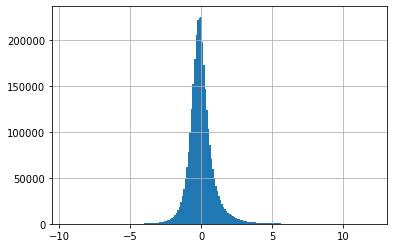

In [5]:
from scipy.stats import normaltest
print("Normal test:", normaltest(df.target))
df.target.hist(bins=200)

### Let's look at some feature distributions

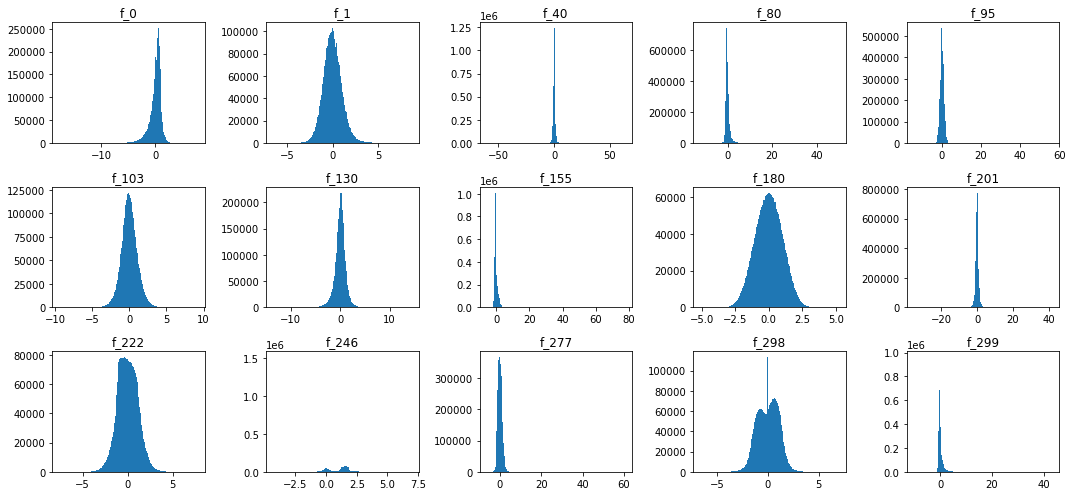

In [6]:
# I haven't searched for interesting features, just took some
features = ['f_0', 'f_1', 'f_40', 'f_80', 'f_95',
            'f_103', 'f_130', 'f_155', 'f_180', 'f_201', 
            'f_222','f_246', 'f_277', 'f_298','f_299']
fig, ax = plt.subplots(3, 5, figsize=(15, 7))
for i in range(15):
    ax[i//5][i%5].hist(df[features[i]], bins=200)
    ax[i//5][i%5].set_title(features[i])
plt.tight_layout()

### Some guys (f_298) are having too much 0s, let's see

In [7]:
df.f_0.value_counts()

0.000     29359
-4.264       25
-4.754       17
-1.906       12
-3.814       12
          ...  
-0.710        1
-2.124        1
-0.627        1
0.693         1
-0.090        1
Name: f_0, Length: 3030032, dtype: int64

In [8]:
differences = []
for i in tqdm(range(300)):
    two_most = df[f"f_{i}"].value_counts().iloc[:2]
    difference = two_most.iloc[0] - two_most.iloc[1]
    if difference > 5000:
        assert two_most.index[0] == 0
        differences.append(difference)

100%|██████████| 300/300 [02:40<00:00,  1.86it/s]


[]

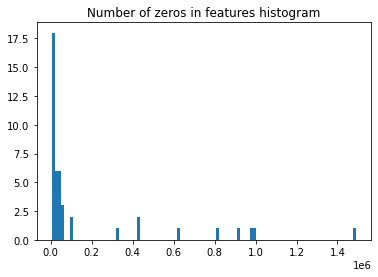

In [9]:
plt.hist(differences, bins=100)
plt.title("Number of zeros in features histogram")
plt.plot()

44 features have more than 5000 0s (I basically computed how many features are there which have the most common value of 0 and the second common value having less occurences than 0s do by 5000)

In [10]:
len(differences)

44